In [166]:
#importing python libraries 

import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from IPython.core.interactiveshell import InteractiveShell
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
warnings.filterwarnings('ignore') # to supress seaborn warnings
pd.options.display.max_columns = None # Remove pandas display column number limit
import xlrd
import csv

# Connect and Fetch  Data

In [167]:
import pandas as pd
import pyodbc

server = 'ARJUN\SQLEXPRESS'
db = 'Insurance'

# Create the connection
conn = pyodbc.connect('DRIVER={SQL Server};SERVER=' +server+';DATABASE='+db+';Trusted_Connection=yes')

# query db
sql = """

select * from INSURANCE_DATA

"""
fulldata = pd.read_sql(sql, conn)
# displaying the dataframe
fulldata.head()

,ID,CUSTOMER_ID,PREMIUM_AMOUNT,SEX,WORK,MARRIAGE,STATE,INSURANCE_TYPE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1.0,11111.0,20000.0,2.0,2.0,1.0,7.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2.0,11112.0,120000.0,2.0,2.0,2.0,6.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3.0,11113.0,90000.0,2.0,2.0,2.0,6.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4.0,11114.0,50000.0,2.0,2.0,1.0,7.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5.0,11115.0,50000.0,1.0,2.0,1.0,4.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


# Cleaning Data

In [168]:
#Checking null values in the dataframe
fulldata.isnull().values.any()

False

In [169]:
#no null values in our data

In [170]:
fulldata.WORK.value_counts()

2.0    14030
1.0    10585
3.0     4917
5.0      280
4.0      123
6.0       51
0.0       14
Name: WORK, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000A45F52DF60>,
      dtype=object)

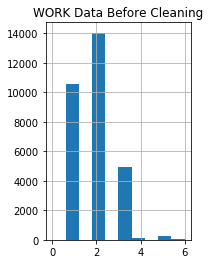

In [171]:
df =pd.DataFrame({'WORK Data Before Cleaning':fulldata.WORK})
df.hist(layout=(1,2))



In [172]:
fulldata.WORK[fulldata.WORK==0]='others'
fulldata.WORK[fulldata.WORK==5]='others'
fulldata.WORK[fulldata.WORK==6]='others'

fulldata.WORK[fulldata.WORK==1]='IT Sector'
fulldata.WORK[fulldata.WORK==2]='Public Sector'
fulldata.WORK[fulldata.WORK==3]='Business'
fulldata.WORK[fulldata.WORK==4]='other Private Sector'


In [173]:
fulldata.WORK.value_counts()

Public Sector           14030
IT Sector               10585
Business                 4917
others                    345
other Private Sector      123
Name: WORK, dtype: int64

Text(0.5,1,'Education After Cleaning Analysis')

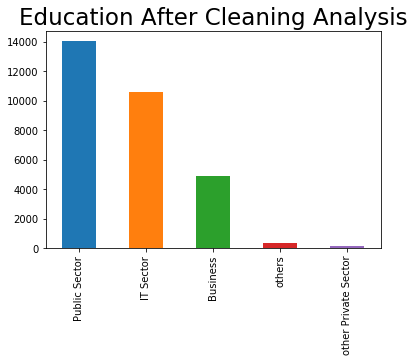

In [174]:

work_bar=fulldata.WORK.value_counts().plot.bar()

work_bar.set_title('Education After Cleaning Analysis',fontsize=23)

In [175]:
fulldata['MARRIAGE'].value_counts()

2.0    15964
1.0    13659
3.0      323
0.0       54
Name: MARRIAGE, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000A45F665400>,
      dtype=object)

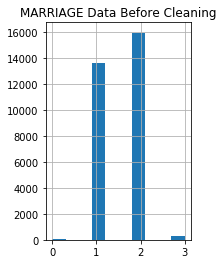

In [176]:
df =pd.DataFrame({'MARRIAGE Data Before Cleaning':fulldata.MARRIAGE})
df.hist(layout=(1,2))


In [177]:
fulldata.MARRIAGE[fulldata.MARRIAGE==0]='others'
fulldata.MARRIAGE[fulldata.MARRIAGE==1]='Single'
fulldata.MARRIAGE[fulldata.MARRIAGE==2]='Married'
fulldata.MARRIAGE[fulldata.MARRIAGE==3]='others'
fulldata.MARRIAGE.value_counts()

Married    15964
Single     13659
others       377
Name: MARRIAGE, dtype: int64

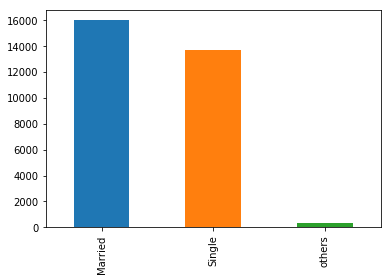

In [178]:
fulldata.MARRIAGE.value_counts().plot.bar()

In [179]:
fulldata.STATE[fulldata.STATE==1]='California'
fulldata.STATE[fulldata.STATE==2]='Texas'
fulldata.STATE[fulldata.STATE==3]='New York'
fulldata.STATE[fulldata.STATE==4]='Nevada'
fulldata.STATE[fulldata.STATE==5]='Colorado'
fulldata.STATE[fulldata.STATE==6]='Texas'
fulldata.STATE[fulldata.STATE==7]='Michigan'

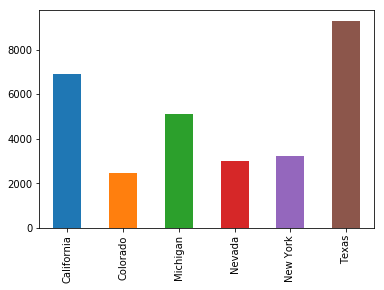

In [180]:
fulldata.STATE.value_counts().sort_index().plot.bar()

In [181]:
fulldata.INSURANCE_TYPE[fulldata.INSURANCE_TYPE==1]='Health'
fulldata.INSURANCE_TYPE[fulldata.INSURANCE_TYPE==2]='AccidentalDeath'
fulldata.INSURANCE_TYPE[fulldata.INSURANCE_TYPE==3]='Dental'
fulldata.INSURANCE_TYPE[fulldata.INSURANCE_TYPE==4]='LongTerm care'
fulldata.INSURANCE_TYPE[fulldata.INSURANCE_TYPE==5]='Vision'


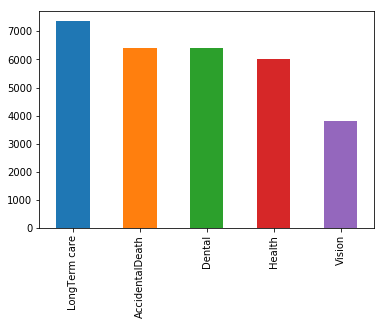

In [182]:
fulldata.INSURANCE_TYPE.value_counts().plot.bar()

In [183]:
fulldata.INSURANCE_TYPE.value_counts()

LongTerm care      7369
AccidentalDeath    6421
Dental             6397
Health             6019
Vision             3794
Name: INSURANCE_TYPE, dtype: int64

In [195]:
fulldata.SEX.value_counts()

2.0    18112
1.0    11888
Name: SEX, dtype: int64

In [196]:
fulldata.SEX[fulldata.SEX==1]='Female'
fulldata.SEX[fulldata.SEX==2]='Male'


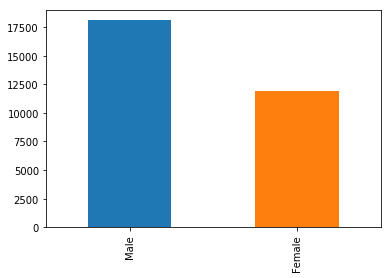

In [197]:
fulldata['SEX'].value_counts().plot.bar()

In [184]:
fulldata.head()

,ID,CUSTOMER_ID,PREMIUM_AMOUNT,SEX,WORK,MARRIAGE,STATE,INSURANCE_TYPE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1.0,11111.0,20000.0,2.0,Public Sector,Single,Michigan,Health,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2.0,11112.0,120000.0,2.0,Public Sector,Married,Texas,AccidentalDeath,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3.0,11113.0,90000.0,2.0,Public Sector,Married,Texas,AccidentalDeath,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4.0,11114.0,50000.0,2.0,Public Sector,Single,Michigan,Health,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5.0,11115.0,50000.0,1.0,Public Sector,Single,Nevada,Health,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [185]:
fulldata[['SEX','WORK','MARRIAGE','STATE','INSURANCE_TYPE']].describe()

,SEX
count,30000.000000
mean,1.603733
std,0.489129
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,2.000000


In [186]:
fulldata.rename(columns={'PAY_0':'PAY_1'},inplace=True)

In [187]:
fulldata.rename(columns={'default payment next month':'DEFAULTER'},inplace=True)

In [188]:
fulldata.head()

,ID,CUSTOMER_ID,PREMIUM_AMOUNT,SEX,WORK,MARRIAGE,STATE,INSURANCE_TYPE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER
0,1.0,11111.0,20000.0,2.0,Public Sector,Single,Michigan,Health,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2.0,11112.0,120000.0,2.0,Public Sector,Married,Texas,AccidentalDeath,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3.0,11113.0,90000.0,2.0,Public Sector,Married,Texas,AccidentalDeath,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4.0,11114.0,50000.0,2.0,Public Sector,Single,Michigan,Health,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5.0,11115.0,50000.0,1.0,Public Sector,Single,Nevada,Health,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [189]:

def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

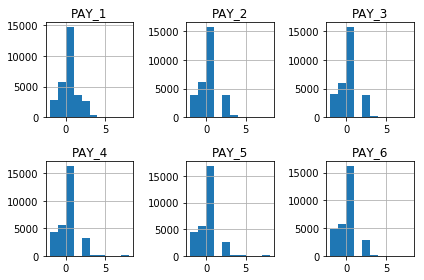

In [190]:
late = fulldata[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)


In [191]:
#making the values in PAY_number meaningful by removing the negative values in it

fil = (fulldata.PAY_1 ==-2) | (fulldata.PAY_1 ==-1) | (fulldata.PAY_1 ==0)
fulldata.loc[fil, 'PAY_1'] =0

fil = (fulldata.PAY_2 ==-2) | (fulldata.PAY_2 ==-1) | (fulldata.PAY_2 ==0)
fulldata.loc[fil, 'PAY_2'] =0

fil = (fulldata.PAY_3 ==-2) | (fulldata.PAY_3 == -1) | (fulldata.PAY_3 ==0)
fulldata.loc[fil, 'PAY_3'] =0


fil = (fulldata.PAY_4 ==-2) | (fulldata.PAY_4 ==-1) | (fulldata.PAY_4 ==0)
fulldata.loc[fil, 'PAY_4'] =0


fil = (fulldata.PAY_5 ==-2) | (fulldata.PAY_5 == -1) | (fulldata.PAY_5 ==0)
fulldata.loc[fil, 'PAY_5'] =0


fil = (fulldata.PAY_6 ==-2) | (fulldata.PAY_6== -1) | (fulldata.PAY_6 ==0)
fulldata.loc[fil, 'PAY_6'] =0


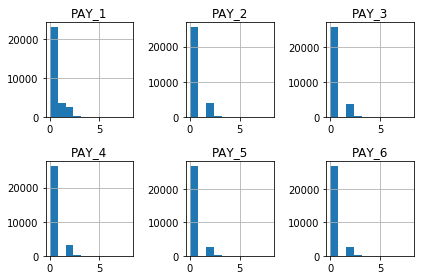

In [192]:
late = fulldata[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

In [194]:
fulldata.sample(50)

,ID,CUSTOMER_ID,PREMIUM_AMOUNT,SEX,WORK,MARRIAGE,STATE,INSURANCE_TYPE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER
8423,8424.0,19534.0,500000.0,1.0,IT Sector,Single,Nevada,LongTerm care,43.0,0.0,0.0,2.0,0.0,0.0,0.0,14132.0,35814.0,20089.0,28077.0,132588.0,115442.0,35820.0,18.0,28077.0,132588.0,28500.0,20000.0,0.0
14275,18532.0,25386.0,200000.0,2.0,Public Sector,Single,Michigan,Dental,27.0,0.0,0.0,0.0,0.0,0.0,0.0,14753.0,3670.0,5865.0,1303.0,4579.0,1107.0,3670.0,5865.0,1303.0,4579.0,1107.0,2109.0,0.0
22427,12320.0,30002.0,240000.0,2.0,others,Single,California,Dental,34.0,0.0,0.0,0.0,0.0,0.0,0.0,1731.0,6763.0,0.0,5717.0,10134.0,1045.0,6763.0,5717.0,0.0,10134.0,1045.0,6585.0,0.0
23470,27423.0,34581.0,170000.0,1.0,Public Sector,Married,Texas,Dental,31.0,0.0,0.0,0.0,0.0,0.0,0.0,172012.0,167929.0,116189.0,192082.0,120077.0,92593.0,168019.0,5000.0,6000.0,7125.0,5000.0,4500.0,0.0
3505,3506.0,14616.0,150000.0,2.0,IT Sector,Married,California,LongTerm care,27.0,0.0,0.0,0.0,0.0,0.0,0.0,30585.0,30138.0,0.0,0.0,0.0,0.0,6000.0,0.0,0.0,0.0,0.0,0.0,0.0
23722,27675.0,34833.0,50000.0,2.0,Public Sector,Married,Texas,Health,24.0,0.0,0.0,0.0,0.0,0.0,0.0,43638.0,42146.0,30026.0,29857.0,30619.0,30376.0,2200.0,1700.0,2000.0,1261.0,1419.0,1400.0,0.0
22475,12368.0,30050.0,90000.0,1.0,IT Sector,Single,California,AccidentalDeath,34.0,2.0,0.0,0.0,0.0,0.0,0.0,54933.0,55460.0,56599.0,58155.0,60058.0,61250.0,2009.0,2057.0,2500.0,3000.0,2189.0,2282.0,1.0
27644,21681.0,38755.0,90000.0,2.0,Public Sector,Married,Texas,AccidentalDeath,23.0,0.0,0.0,0.0,0.0,0.0,0.0,13107.0,13740.0,14770.0,13306.0,10465.0,9704.0,1251.0,1281.0,1173.0,500.0,1000.0,1000.0,0.0
25042,28995.0,36153.0,270000.0,2.0,Business,Single,Colorado,Dental,41.0,0.0,0.0,0.0,0.0,0.0,0.0,48872.0,43688.0,35638.0,41704.0,43869.0,45160.0,3688.0,2638.0,6704.0,2869.0,2000.0,1686.0,0.0
10571,16188.0,23042.0,30000.0,2.0,Public Sector,Married,Texas,Health,37.0,2.0,0.0,0.0,0.0,0.0,0.0,25037.0,18486.0,19082.0,19145.0,15839.0,9335.0,2000.0,2000.0,2500.0,2000.0,2000.0,4000.0,0.0
